In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored

# Classification Using Logistic Regression

float32
float32


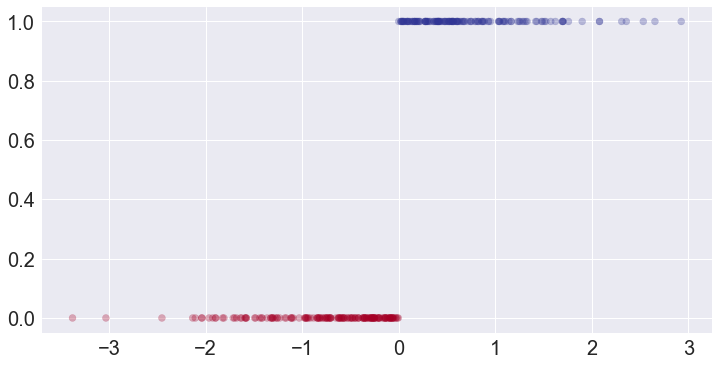

In [83]:
n_sample = 300
x_train = np.random.normal(0,1,size = (n_sample,1)).astype(np.float32)
y_train = (x_train >= 0).astype(np.float32) #convert bool to float

#plot
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (12,6))
ax.scatter(x_train,y_train, c = y_train, cmap = "RdYlBu", alpha = 0.3)
ax.tick_params(labelsize = 20)

print(x_train.dtype)
print(y_train.dtype)

# Model Construction

In [89]:
# construct model
class Classifier(tf.keras.Model):
    def __init__(self):
        super(Classifier, self).__init__()
        
        #define layer: 모델에 들어갈 재료들 만들기
        self.layer_1 = tf.keras.layers.Dense(units = 1, 
                                             activation = "sigmoid")
        
    def call(self,x):
        prediction = self.layer_1(x)
        return prediction
    
#constant: hyperparameter
LR = 0.01
EPOCHS = 10

# Run without loss_metric 
#### Does not show the accurate performance of the current model as it present the loss of only the last data example on each epoch 

In [79]:
# define model 
model = Classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate = LR)

for epoch in range(EPOCHS):
    for x,y in zip(x_train,y_train):
        # change shape to matrix format (previous: (1,) -> now: (1,1))
        x = tf.reshape(x,shape = (1,1))
        y = tf.reshape(y,shape = (1,1))
        
        #forward prop
        with tf.GradientTape() as tape:
            prediction = model(x)
            loss = loss_object(y,prediction)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
        
    template = "Train loss: {:.4f}\n"        
    # the loss here only print the loss of the last data example on each epoch 
    print(colored("EPOCH{}".format(epoch+1), "grey", "on_cyan"), template.format(loss))



EPOCH1 Train loss: 0.4841

EPOCH2 Train loss: 0.5034

EPOCH3 Train loss: 0.4919

EPOCH4 Train loss: 0.4800

EPOCH5 Train loss: 0.4654

EPOCH6 Train loss: 0.4417

EPOCH7 Train loss: 0.4223

EPOCH8 Train loss: 0.4053

EPOCH9 Train loss: 0.3839

EPOCH10 Train loss: 0.3689



# Run with loss_metric 
#### Compute the mean of loss for each epoch

In [90]:
# define model 
model = Classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate = LR)

loss_metric = tf.keras.metrics.Mean() #각 epoch data에 대한 loss의 평균값을 계산한다

#Calculates how often prediction matches one hot labels ->몇퍼센트를 맞췄는지 
acc_metric = tf.keras.metrics.CategoricalAccuracy() 

for epoch in range(EPOCHS):
    for x,y in zip(x_train,y_train):
        # change shape to matrix format (previous: (1,) -> now: (1,1))
        x = tf.reshape(x,shape = (1,1))
        y = tf.reshape(y,shape = (1,1))
        
        #forward prop
        with tf.GradientTape() as tape:
            prediction = model(x)
            loss = loss_object(y,prediction)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
        
        #한번 iteration이 돌고 loss를 loss_metric 에 넣어줌/acc_metric에 y, y_hat을 넣어줌 
        #이후 현 epoch의 평균 loss와 acc를 구하는데 사용함 
        loss_metric(loss)
        acc_metric(y,prediction)
        
        
    template = "Train loss: {:.4f}\tTrain Acc:{:.2f}%"        
    # compute the overall mean loss/acc of the current epoch
    ds_loss = loss_metric.result()
    ds_acc = acc_metric.result()
    print(colored("EPOCH{}\n".format(epoch+1), "grey", "on_cyan"), template.format(ds_loss,ds_acc*100), "\n")

EPOCH1
 Train loss: 0.9557	Train Acc:100.00% 

EPOCH2
 Train loss: 0.7421	Train Acc:100.00% 

EPOCH3
 Train loss: 0.6274	Train Acc:100.00% 

EPOCH4
 Train loss: 0.5548	Train Acc:100.00% 

EPOCH5
 Train loss: 0.5039	Train Acc:100.00% 

EPOCH6
 Train loss: 0.4656	Train Acc:100.00% 

EPOCH7
 Train loss: 0.4356	Train Acc:100.00% 

EPOCH8
 Train loss: 0.4112	Train Acc:100.00% 

EPOCH9
 Train loss: 0.3908	Train Acc:100.00% 

EPOCH10
 Train loss: 0.3735	Train Acc:100.00% 



In [91]:
x_min, x_max = x_train.min(), x_train.max()
print("Min,Max:", x_min,",",x_max)

#Return evenly spaced numbers over a specified interval.
x_test = np.linspace(x_min, x_max, 300, dtype = np.float32).reshape((300,1))
x_test_tf = tf.constant(x_test)
print("t_test_tf shape:", x_test_tf.shape)

#학습된 model을 이용해 prediction 
y_prediction_tf = model(x_test_tf)

#return to numpy for plotting
x_result = x_test_tf.numpy()
y_result = y_prediction_tf.numpy()
print("plotting shape:", x_result.shape, y_result.shape)

Min,Max: -3.378549 , 2.9274971
t_test_tf shape: (300, 1)
plotting shape: (300, 1) (300, 1)


float32
float32


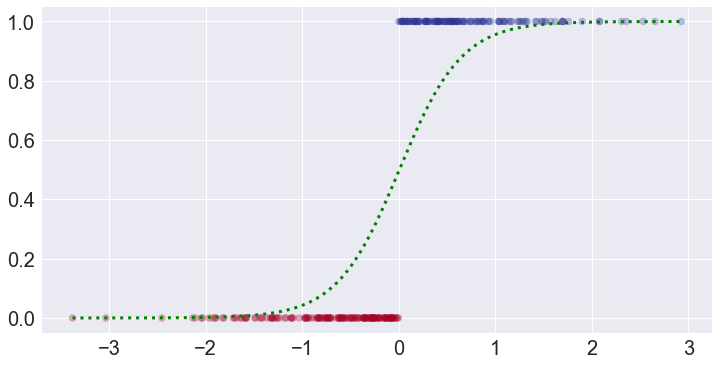

In [96]:
#plotting

#plot
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (12,6))
ax.scatter(x_train,y_train, c = y_train, cmap = "RdYlBu", alpha = 0.3)
ax.plot(x_result,y_result,"g:", linewidth = 3)
ax.tick_params(labelsize = 20)

print(x_train.dtype)
print(y_train.dtype)